<a href="https://colab.research.google.com/github/shaynyx/marvel-level-2/blob/main/task_8_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine (SVM)**

A Support Vector Machine (SVM) is a binary linear classification whose decision boundary is explicitly constructed to minimize generalization error. It is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection.

SVM is well suited for classification of complex but small or medium sized datasets.

In [33]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [34]:
df=pd.DataFrame(cancer.data, columns = cancer
                .feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df['label']=cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


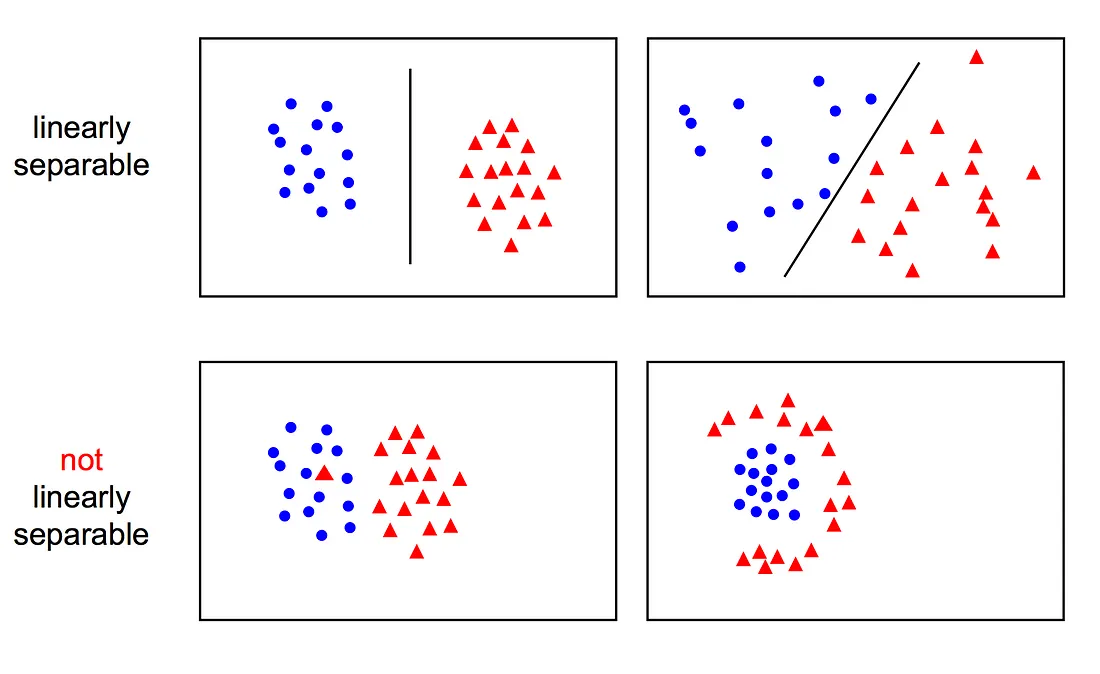

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# prompt: split into train and test data

# Load the breast cancer dataset
# data = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)


In [38]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')

In [39]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
y_predict=clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[39  4]
 [ 1 70]]


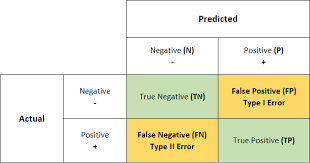

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

cm=np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion=pd.DataFrame(cm, index=['is_cancer','is_healthy'], columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,70,1
is_healthy,4,39


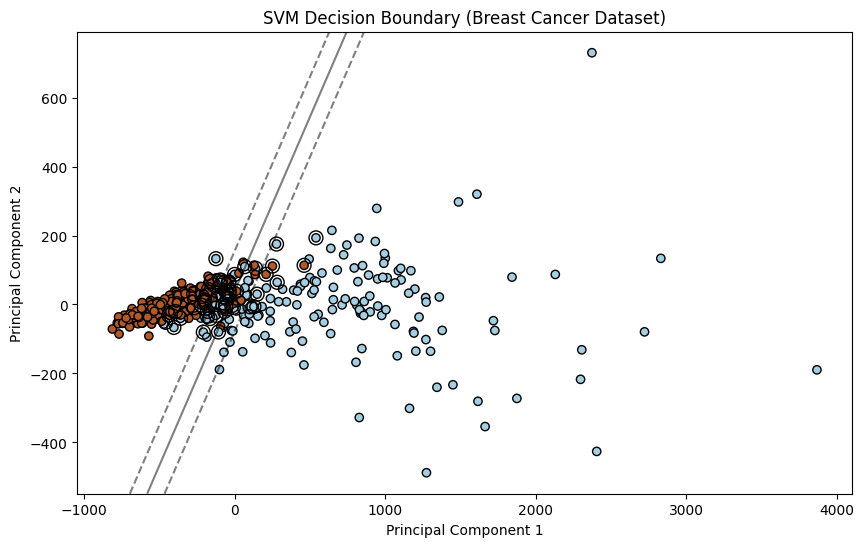

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the transformed data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

# Create grid to evaluate model
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
support_vectors_pca = pca.transform(clf.support_vectors_)
ax.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1],
           s=100, facecolors='none', edgecolors='k')

ax.set_title('SVM Decision Boundary (Breast Cancer Dataset)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()


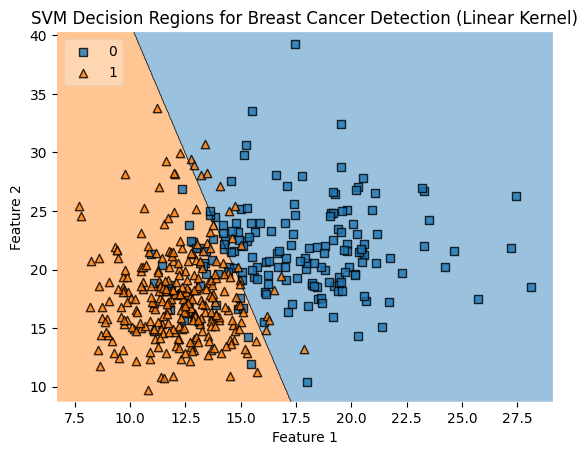

In [57]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

X = X_train
y = y_train

# Create an SVM classifier with a linear kernel
svm = SVC(C=0.5, kernel='linear')
svm.fit(X[:, :2], y)  # Use only the first two features for visualization

# Set filler features for the remaining features
filler_feature_values = {i: X.mean(axis=0)[i] for i in range(2, X.shape[1])}

# Plot decision regions
plot_decision_regions(X[:, :2], y, clf=svm, legend=2, filler_feature_values=filler_feature_values)

# Adding axes annotations
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Regions for Breast Cancer Detection (Linear Kernel)')
plt.show()
